<a href="https://colab.research.google.com/github/michaeledge27/mathModeling/blob/main/projects/shufflingUnderConstraints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [338]:
# Define the cards
clubs = ['club 2', 'club 3', 'club 4', 'club 5', 'club 6']
diamonds = ['diamond 2', 'diamond 3', 'diamond 4', 'diamond 5', 'diamond 6']
hearts = ['heart 2', 'heart 3', 'heart 4', 'heart 5', 'heart 6']
spades = ['spade 2', 'spade 3', 'spade 4']

In [339]:
all_cards = clubs + diamonds + hearts + spades

In [340]:
# Define constraints
club_spade_positions = [0, 3, 6, 9, 12, 15]      # No clubs or spades
heart_positions = [1, 4, 7, 10, 13]          # No hearts
diamond_spade_positions = [2, 5, 8, 11, 14, 17]  # No diamonds or spades

In [341]:
# Function to check if an allocation is legal
def is_legal_allocation(positions):
    for i in club_spade_positions:
        if 'club' in positions[i] or 'spade' in positions[i]:
            return False
    for i in heart_positions:
        if 'heart' in positions[i]:
            return False
    for i in diamond_spade_positions:
        if 'diamond' in positions[i] or 'spade' in positions[i]:
            return False
    return True

In [342]:
# Start with a legal allocation
def initial_legal_allocation():
    while True:
        random.shuffle(all_cards)
        if is_legal_allocation(all_cards):
            return all_cards[:]

In [343]:
initial_legal_allocation()

['diamond 6',
 'spade 3',
 'heart 5',
 'heart 6',
 'spade 4',
 'club 3',
 'diamond 3',
 'spade 2',
 'club 6',
 'heart 2',
 'diamond 5',
 'heart 4',
 'heart 3',
 'club 2',
 'club 5',
 'diamond 2',
 'diamond 4',
 'club 4']

In [344]:
example = initial_legal_allocation()
example

['heart 4',
 'spade 4',
 'heart 6',
 'heart 3',
 'spade 2',
 'heart 2',
 'diamond 4',
 'diamond 2',
 'club 5',
 'diamond 3',
 'club 2',
 'club 6',
 'diamond 6',
 'spade 3',
 'club 4',
 'diamond 5',
 'heart 5',
 'club 3']

In [345]:
is_legal_allocation(example)

True

In [346]:
def markov_chain_step(positions):
    indices = random.sample(range(len(positions)), 3)  # Choose three random positions
    cards = [positions[i] for i in indices]

    # Pick a random swap option
    swap_options = [
        (0, 1), (0, 2), (1, 2),   # Pairwise swaps
        (0, 1, 2), (0, 2, 1)      # Cyclic swaps (A->B->C, A->C->B)
    ]
    chosen_option = random.choice(swap_options)

    # Perform the chosen swap
    new_positions = positions[:]
    if len(chosen_option) == 2:  # Pairwise swap
        new_positions[indices[chosen_option[0]]], new_positions[indices[chosen_option[1]]] = cards[chosen_option[1]], cards[chosen_option[0]]
    else:  # Cyclic swap
        new_positions[indices[chosen_option[0]]], new_positions[indices[chosen_option[1]]], new_positions[indices[chosen_option[2]]] = cards[chosen_option[1]], cards[chosen_option[2]], cards[chosen_option[0]]

    # Return new allocation if legal, otherwise return original
    return new_positions if is_legal_allocation(new_positions) else positions

In [347]:
# example = markov_chain_step(initial_legal_allocation())
# example

Want to have all of the possible legal allocations of the cards and run my algorithm a bunch of times, demonstrating the normal distribution across possible shuffles

In [348]:
# current_positions = initial_legal_allocation()
# current_positions

In [349]:
# all_positions = [current_positions]
# all_positions

In [350]:
# position_counts = defaultdict(lambda: [0] * 18)
# position_counts

In [351]:
# for _ in range(10):
#     new_positions = markov_chain_step(current_positions)
#     print(new_positions)
#     for i, card in enumerate(new_positions):
#         position_counts[card][i] += 1

In [352]:
# position_counts

In [353]:
# Collect position frequencies
def markov_chain_simulation(iterations):
    current_positions = initial_legal_allocation() # Start with legal allocation
    all_positions = [current_positions]
    position_counts = defaultdict(lambda: [0] * 18)

    for _ in range(iterations):
        current_positions = markov_chain_step(current_positions)
        for i, card in enumerate(current_positions):
            position_counts[card][i] += 1
    invariant_distribution = {card: [count / iterations for count in counts] for card, counts in position_counts.items()}
    return invariant_distribution, all_positions

In [354]:
iterations = 500
invariant_distribution, all_positions = markov_chain_simulation(iterations)


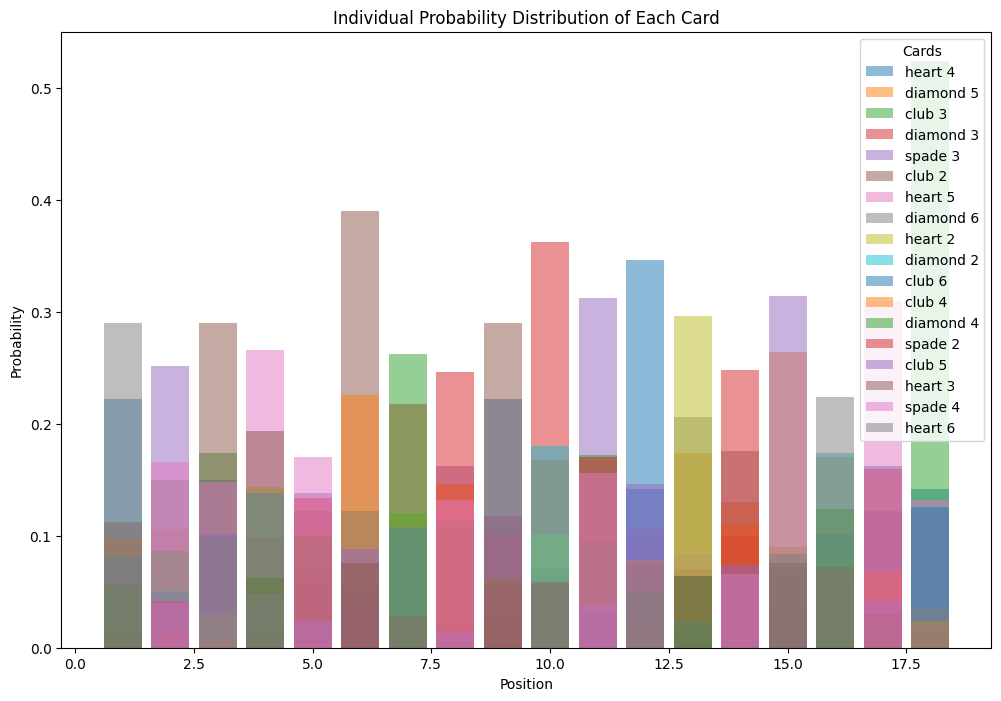

In [355]:
# Visualize the individual card distributions
plt.figure(figsize=(12, 8))
for card, probs in invariant_distribution.items():
    plt.bar(positions, probs, alpha=0.5, label=card)

plt.xlabel('Position')
plt.ylabel('Probability')
plt.title('Individual Probability Distribution of Each Card')
plt.legend(title='Cards')
plt.show()

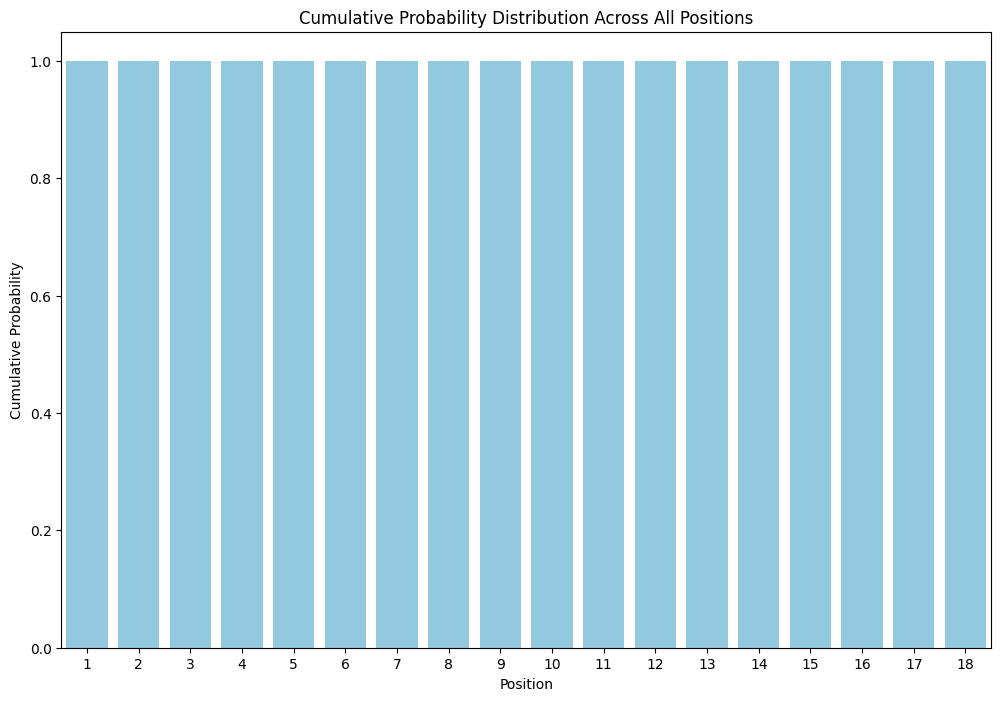

In [336]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

positions_count = 18

# Initialize an array to store the cumulative probability at each position
position_probabilities = np.zeros(positions_count)

# Sum the probabilities for each card in each position
for card, probs in invariant_distribution.items():
    position_probabilities += probs  # Aggregate probabilities for each position

# Create the bar plot for all 18 positions
positions = np.arange(1, positions_count + 1)

plt.figure(figsize=(12, 8))
sns.barplot(x=positions, y=position_probabilities, color='skyblue')

plt.xlabel('Position')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Probability Distribution Across All Positions')
plt.show()


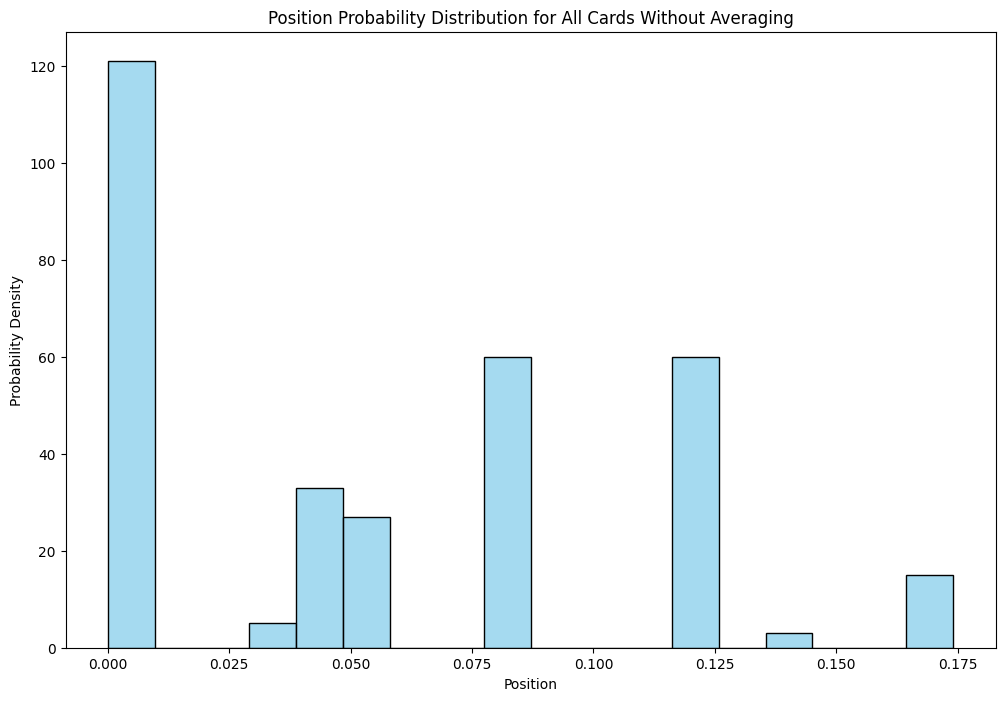

In [297]:


positions_count = 18

# Initialize a matrix to store the distribution of each position for all cards
position_probabilities = np.zeros((positions_count, len(invariant_distribution)))

# Collect probabilities for each card in each position
for card_idx, (card, probs) in enumerate(invariant_distribution.items()):
    position_probabilities[:, card_idx] = probs  # Store each card's probabilities by position

# Flatten the position probabilities matrix for a single histogram
all_position_probs = position_probabilities.flatten()

# Generate a list of repeated position numbers for the histogram
positions = np.tile(np.arange(1, positions_count + 1), len(invariant_distribution))

plt.figure(figsize=(12, 8))
sns.histplot(data=all_position_probs, bins=positions_count, kde=False, color='skyblue')

plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('Position Probability Distribution for All Cards Without Averaging')
plt.show()


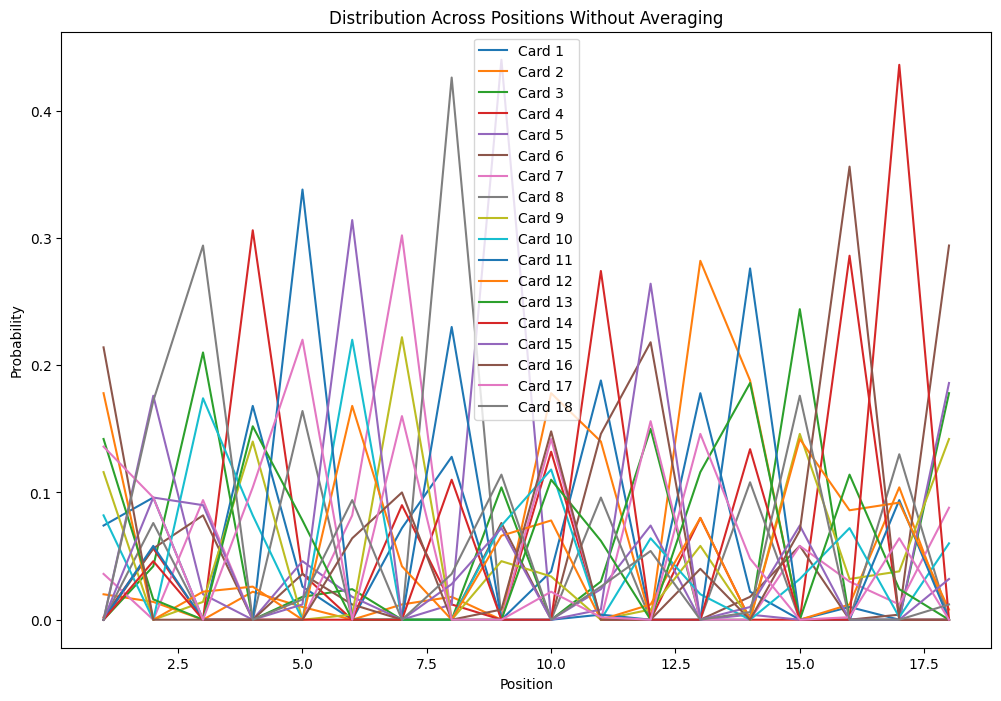

In [259]:

positions_count = 18

# Initialize a matrix to store the distribution of each position for all cards
position_probabilities = np.zeros((positions_count, len(invariant_distribution)))

# Collect probabilities for each card in each position
for card_idx, (card, probs) in enumerate(invariant_distribution.items()):
    position_probabilities[:, card_idx] = probs  # Store each card's probabilities by position

# Plot individual position probabilities across all cards
positions = np.arange(1, positions_count + 1)  # Position indices (1 to 18)
plt.figure(figsize=(12, 8))

# Plot each card’s distribution at each position
for card_idx in range(len(invariant_distribution)):
    sns.lineplot(x=positions, y=position_probabilities[:, card_idx], label=f'Card {card_idx+1}')

plt.xlabel('Position')
plt.ylabel('Probability')
plt.title('Distribution Across Positions Without Averaging')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Aggregate Distribution Across Positions')

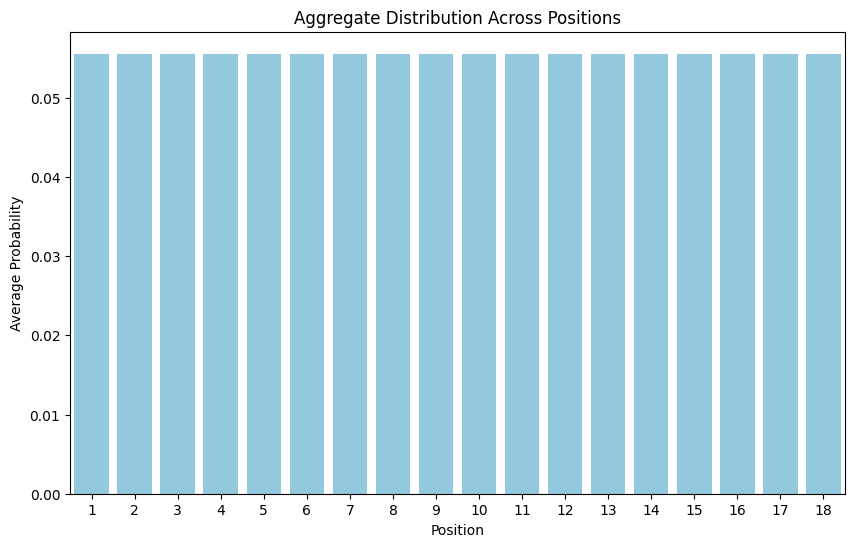

In [238]:

# Aggregate the probabilities across all cards for each position
positions_count = 18
position_probabilities = [0] * positions_count

# Sum the probabilities across all cards for each position
for card, probs in invariant_distribution.items():
    for i, prob in enumerate(probs):
        position_probabilities[i] += prob

# Normalize by the number of cards to get average probability per position
num_cards = len(invariant_distribution)
average_position_probabilities = [prob / num_cards for prob in position_probabilities]

# Plot the aggregate distribution
positions = np.arange(1, positions_count + 1)  # Position indices (1 to 15)

plt.figure(figsize=(10, 6))
sns.barplot(x=positions, y=average_position_probabilities, color='skyblue')
plt.xlabel('Position')
plt.ylabel('Average Probability')
plt.title('Aggregate Distribution Across Positions')



In [239]:
distribution_df = pd.DataFrame(invariant_distribution)
distribution_df


,diamond 6,spade 4,club 5,heart 5,club 6,club 3,diamond 5,diamond 3,heart 2,diamond 4,spade 2,heart 3,diamond 2,club 2,heart 6,heart 4,spade 3,club 4
0,0.078,0.000,0.000,0.320,0.000,0.000,0.000,0.108,0.170,0.140,0.000,0.092,0.076,0.000,0.006,0.010,0.000,0.000
1,0.000,0.460,0.010,0.000,0.024,0.072,0.046,0.230,0.000,0.000,0.112,0.000,0.000,0.000,0.000,0.000,0.046,0.000
2,0.000,0.000,0.122,0.018,0.230,0.034,0.000,0.000,0.112,0.000,0.000,0.030,0.000,0.198,0.000,0.212,0.000,0.044
3,0.100,0.000,0.000,0.132,0.000,0.000,0.118,0.178,0.102,0.098,0.000,0.076,0.056,0.000,0.092,0.048,0.000,0.000
4,0.230,0.074,0.000,0.000,0.166,0.056,0.134,0.088,0.000,0.106,0.086,0.000,0.000,0.002,0.000,0.000,0.038,0.020
5,0.000,0.000,0.146,0.000,0.052,0.140,0.000,0.000,0.118,0.000,0.000,0.110,0.000,0.096,0.166,0.024,0.000,0.148
6,0.066,0.000,0.000,0.000,0.000,0.000,0.384,0.000,0.154,0.032,0.000,0.012,0.270,0.000,0.052,0.030,0.000,0.000
7,0.104,0.180,0.058,0.000,0.042,0.148,0.112,0.056,0.000,0.100,0.044,0.000,0.018,0.036,0.000,0.000,0.102,0.000
8,0.000,0.000,0.184,0.222,0.034,0.000,0.000,0.000,0.034,0.000,0.000,0.328,0.000,0.122,0.002,0.020,0.000,0.054
9,0.104,0.000,0.000,0.000,0.000,0.000,0.036,0.076,0.110,0.054,0.000,0.096,0.260,0.000,0.228,0.036,0.000,0.000


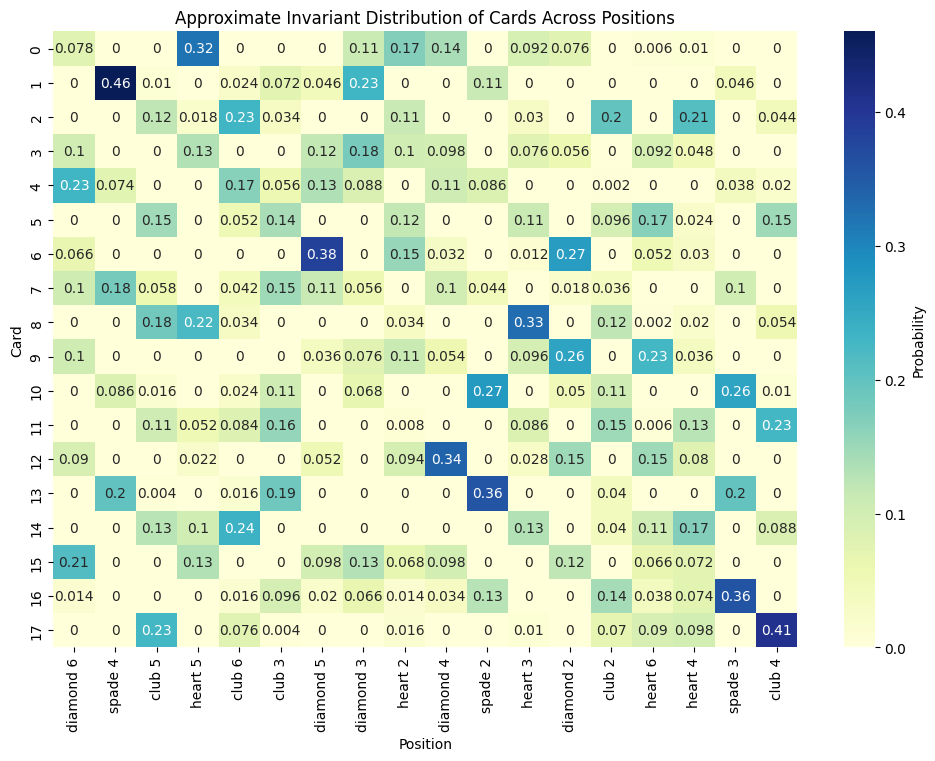

In [240]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(distribution_df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Probability'})
plt.title("Approximate Invariant Distribution of Cards Across Positions")
plt.xlabel("Position")
plt.ylabel("Card")
plt.show()
